This notebook is used to compare the default TF-IDF preprocessor with the customn one.

In [1]:
from numpy import argmin
from text_embeddings.preprocessing.read_pdf import *
from user_interface.cli import *
from sklearn.feature_extraction.text import TfidfVectorizer
from text_embeddings.TFIDF.preprocessing.TfidfTextPreprocessor import *
from elasticSearch.queries.query_documents_tfidf import *

In [2]:
file_paths = glob.glob('/Users/klara/Documents/Uni/bachelorarbeit/data/0/*.pdf')
docs = get_docs_from_file_paths(file_paths)

The following TFIDF model is supposed to be used to find similar documents in a large corpus and thus, ignores unique (per document) words in its vocabulary.
Moreover, it aims to keep its vocabulary reasonably small.

### Default preprocessing
This sklearn model automatically turns the text into lowercase and removes punctuation, numbers, accents, stopwords.
It does not use n-gram, n>1, since it has proven to reduce the number of dimensions in the vocabulary/ vector and moreover, it enlargens the vocabulary.
# TODO: check if it also stems/ lemmatize the words
However, it does not seem to find word groups (e.g. aa, aaa).


In [3]:
default_tfidf = TfidfVectorizer(input='content', lowercase=True, min_df=3, max_df=int(len(docs)*0.07), analyzer='word', stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', strip_accents='ascii')
default_tfidf.fit(docs)

TfidfVectorizer(max_df=13, min_df=3, stop_words='english',
                strip_accents='ascii', token_pattern='(?u)\\b[A-Za-z]+\\b')

In [4]:
vocab_per_preprocessor = {}
vocab_per_preprocessor['default'] = default_tfidf.get_feature_names_out()
print('vocabulary: ', vocab_per_preprocessor['default'], '\nnumber of elements of vocabulary: ', len(vocab_per_preprocessor['default']))

vocabulary:  ['TM' 'aa' 'aaa' ... 'zero' 'zl' 'zurich'] 
number of elements of vocabulary:  1641


In [5]:
print('max df of vocabulary: ', int(len(docs)*0.04))

max df of vocabulary:  7


In [6]:
default_document_term_matrix = default_tfidf.fit_transform(docs).todense()

In [7]:
# all zero tf-idf document embeddings
get_num_all_zero_tfidf_embeddings(default_document_term_matrix, file_paths)

/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC34-38.pdf is all zero
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC86-17.pdf is all zero
number of documents with all zero tf-idf values: 2 from 195


### Custom Preprocessing
This custom preprocessing includes the following steps:
- strip accents
- remove newlines
- lowercase
- discretize numbers
- remove punctuation
- change number encoding
- remove stopwords (english)
- lemmatize
- return text from list of tokens

In [8]:
# Example of custom preprocessor
sample_text = docs[0][:100] + '12312312. Today it is sunny! 212. Today it is rainy 123.123'
print('original sample text:\n', sample_text)
preProc = TfidfTextPreprocessor()
preprocessed_text = preProc.transform(sample_text)
print('\npreprocessed text:\n', preprocessed_text, '\n\n')

original sample text:
   
- THE COMMONWEALTH OF THE BAHAMAS 
The International Business Companies Act 2000; The Segregated 12312312. Today it is sunny! 212. Today it is rainy 123.123


[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>



preprocessed text:
     commonwealth bahamas  international business company act <SMALLNUMBER> segregated <BIGNUMBER> today sunny <SMALLNUMBER> today rainy <FLOAT> 




In [9]:
custom_tfidf = TfidfVectorizer(input='content', preprocessor=TfidfTextPreprocessor().transform, min_df=3, max_df=int(len(docs)*0.07))
custom_document_term_matrix = custom_tfidf.fit_transform(docs).todense()

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loadin

In [10]:
vocab_per_preprocessor['custom'] = custom_tfidf.get_feature_names_out()
print('vocabulary: ', vocab_per_preprocessor['custom'], '\nnumber of elements of vocabulary: ', len(vocab_per_preprocessor['custom']))

vocabulary:  ['aa' 'aaa' 'ab' ... 'ze' 'zl' 'zurich'] 
number of elements of vocabulary:  1609


words in default vocabulary, which are not in custom

In [11]:
difference = set(vocab_per_preprocessor['default']) - set(vocab_per_preprocessor['custom'])
difference2 = set(vocab_per_preprocessor['custom']) - set(vocab_per_preprocessor['default'])

print(difference, difference2)

{'categories', 'circumstance', 'sands', 'arrangements', 'debenture', 'conventions', 'activities', 'parties', 'issues', 'roberts', 'assurances', 'providers', 'ts', 'vacancies', 'thing', 'nav', 'po', 'instructions', 'sources', 'actions', 'mr', 'fractions', 'addenda', 'commissions', 'bonds', 'creditor', 'firms', 'rules', 'derivatives', 'units', 'years', 'subscriptions', 'moneys', 'debts', 'q', 'things', 'facilities', 'weekends', 'ares', 'docs', 'applications', 'fines', 'markets', 'claim', 'hs', 'issuers', 'pocket', 'forms', 'salaries', 'trades', 'trustee', 'preference', 'associations', 'holiday', 'ceases', 'multi', 'benefits', 'calculations', 'cost', 'scb', 'w', 'notaries', 'record', 'principles', 'secretaries', 'advisors', 'quarters', 'particulars', 'rgd', 'parameters', 'appointments', 'lt', 'bodies', 'expression', 'gains', 'definitions', 'appendices', 'priced', 'factors', 'grounds', 'dealers', 'numbers', 'explanations', 'advisor', 'defaults', 'consequences', 'warrant', 'euros', 'reports

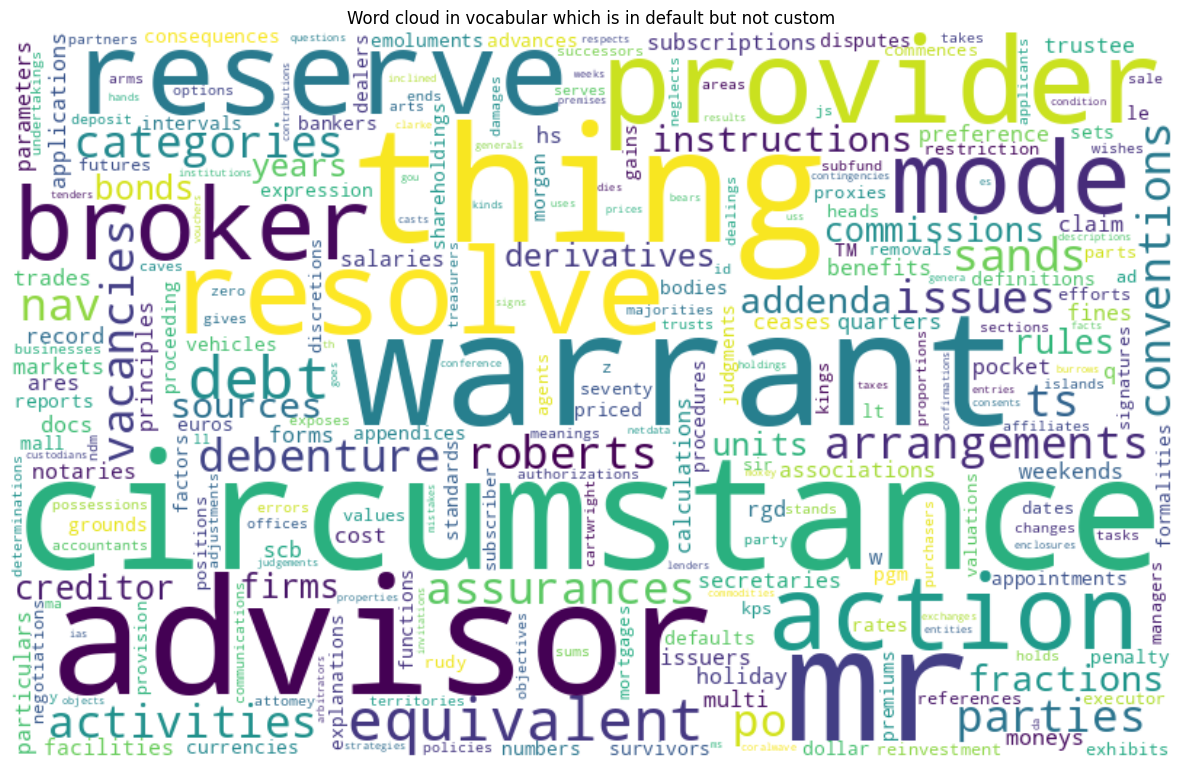

In [12]:
from text_visualizations import visualize_texts
visualize_texts.word_cloud(tokens=difference, file_name='vocabular which is in default but not custom', outpath = 'results', return_img=False)

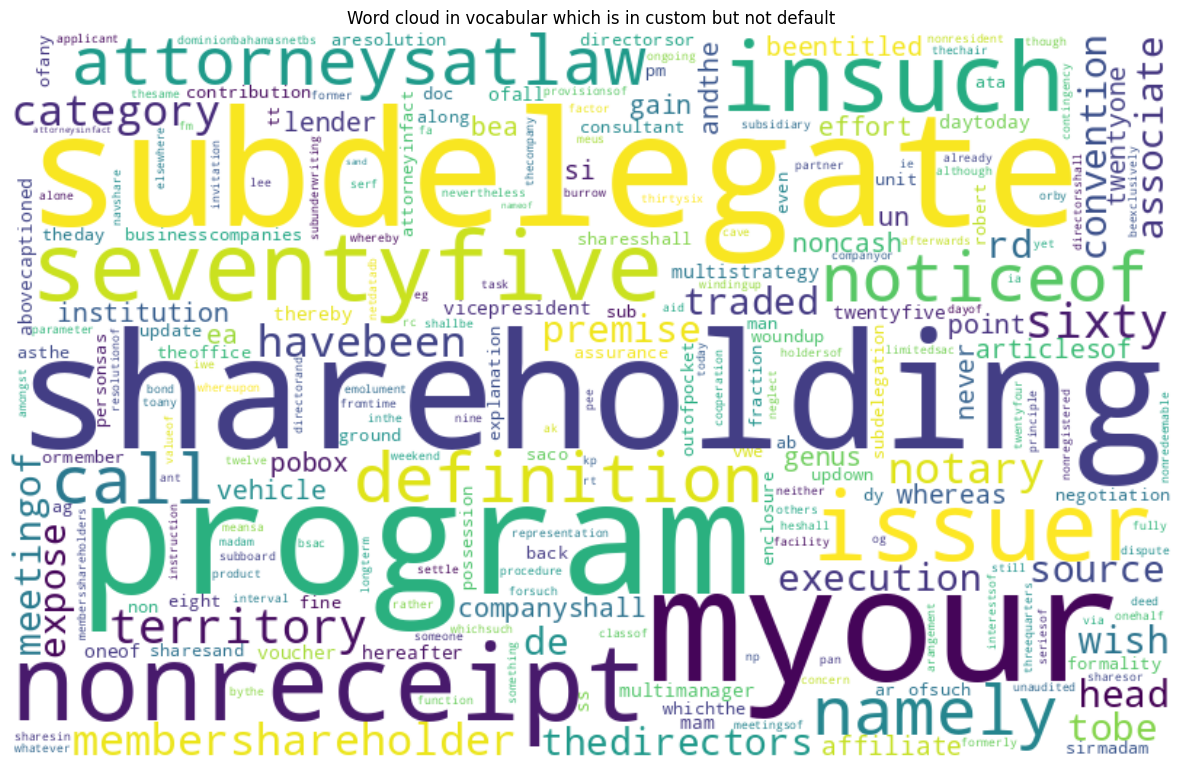

In [13]:
visualize_texts.word_cloud(tokens=difference2, file_name='vocabular which is in custom but not default', outpath = 'results', return_img=False)

In [14]:
# all zero tf-idf document embeddings
get_num_all_zero_tfidf_embeddings(custom_document_term_matrix, file_paths)

/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC34-38.pdf is all zero
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC86-17.pdf is all zero
number of documents with all zero tf-idf values: 2 from 195


### Comparison default vs custom preprocessing

In [15]:

print('The smallest vocabulary is: ', list(vocab_per_preprocessor.keys())[argmin([len(vocab_per_preprocessor[p]) for p in list(vocab_per_preprocessor.keys())])])

for p in list(vocab_per_preprocessor.keys()):
    print('# words in the vocabulary of preprocessor ', p, ' is: ', len(vocab_per_preprocessor[p]))

The smallest vocabulary is:  custom
# words in the vocabulary of preprocessor  default  is:  1641
# words in the vocabulary of preprocessor  custom  is:  1609


### General tfidf/ document (statistical) properties

In [16]:
# returns tf-idf values for the first document with token human readable, but SORTED (≠ document vectorization)
print(get_tfidf_per_doc(custom_tfidf, 0, custom_document_term_matrix))

                  tfidf
innovatis      0.522769
classof        0.261385
authorisation  0.249461
nonregistered  0.239719
ere            0.239719
...                 ...
eo             0.000000
envelope       0.000000
entitlement    0.000000
entirety       0.000000
zurich         0.000000

[1609 rows x 1 columns]


In [17]:
# document search engine using TF-IDF and cosine similarity
transformed_query = print_tfidf_transformation_example(tfidf=custom_tfidf, query='human readable Bahamas credit system')    # format: (doc_no, token_no) tfidf value
 
print_cosine_similarity_examples(transformed_query=transformed_query, document_term_matrix=custom_tfidf.fit_transform(docs))

transformation to (document number, token encoding) tf-idf score
   (0, 383)	1.0


[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loadin

similarity between documents in trainings corpus:
 [[1.         0.         0.         ... 0.         0.14857595 0.        ]
 [0.         1.         0.         ... 0.03029976 0.         0.        ]
 [0.         0.         1.         ... 0.00956945 0.00998179 0.        ]
 ...
 [0.         0.03029976 0.00956945 ... 1.         0.         0.        ]
 [0.14857595 0.         0.00998179 ... 0.         1.         0.0443241 ]
 [0.         0.         0.         ... 0.         0.0443241  1.        ]]
similarity between documents in trainings corpus and query:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.01368875]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.31801069]
 [0.        ]
 [0.        ]
 [0.15647429]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.      

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loadin